In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import patsy
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble  import RandomForestRegressor
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

import multiprocessing
import xgboost as xgb

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import multiprocessing
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [3]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 100)


In [4]:
path = "/Users/rafa/Desktop/WBS Project/FM 2023.csv"
df_original = pd.read_csv(path)

In [5]:
df = df_original.copy()

In [6]:
df_graph1 = df

In [7]:
df_graph1["Values"]
df_graph1 = df_graph1.reindex(columns=['Name', 'Values', 'Age', 'Gender'])
df_graph1.head(10)

,Name,Values,Age,Gender
0,Kevin De Bruyne,347975206,31,NaN
1,Kylian Mbappé,347975206,23,NaN
2,Robert Lewandowski,347975206,33,NaN
3,Erling Haaland,347975206,22,NaN
4,Mohamed Salah,347975206,30,NaN
5,Karim Benzema,102955257,34,NaN
6,Harry Kane,347975206,28,NaN
7,Thibaut Courtois,255605643,30,NaN
8,Virgil van Dijk,347975206,31,NaN
9,Lionel Messi,43973205,35,NaN


In [8]:
count = (df["Values"] >= 500_000_00).sum()
count

899

In [9]:
df.drop(df[df["Values"] >= 500_000_00].index, inplace=True)


In [10]:
df.drop(df[df["Values"] <= 50000].index, inplace=True)


In [11]:
df.drop(["Nationality","Rental club","Salary","Colour of skin","Date of birth","Number of national team appearances","Goals scored for the national team","Race","World reputation","Domestic reputation","Current reputation","RCA" ], axis=1,inplace=True)

In [12]:
df = pd.DataFrame(df)

columns_to_check = {
    "GK", "DL", "DC", "DR", "WBL", "WBR", "DM", "ML", "MC", "MR", "AML", "AMC", "AMR", "ST"
}

def find_column_name(row):
    for col_name in columns_to_check:
        if row[col_name] == 20:
            return col_name
    return None

df['Best_Position'] = df.apply(find_column_name, axis=1)


Cleaning

In [13]:
amr_df = df[(df["Best_Position"] == "AMC")]
amr_df = amr_df.reset_index(drop=True)
amr_df

,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
0,Pablo Sarabia,AM RLC,30,154,156,Paris Saint-Germain,15,15,15,15,17,15,7,13,5,7,15,13,6,17,10,13,11,13,13,16,14,9,15,8,15,8,15,14,15,16,15,6,12,14,13,10,14,9,15,10,15,2,1,1,1,2,1,2,2,3,4,1,7,12,10,10,12,14,14,10,1,1,1,1,10,1,1,15,13,15,17,20,19,1,174,70,20,10,36552285,67045428,AMC
1,Nabil Fekir,AM/S RLC,29,153,158,Real Hispalis,15,13,16,15,16,15,6,14,4,5,16,13,5,17,10,13,12,15,13,16,15,16,16,16,14,8,12,12,15,16,16,5,12,15,14,17,12,12,16,10,13,2,1,2,2,1,3,3,3,4,3,2,10,15,9,13,12,14,9,10,1,1,1,1,1,1,1,1,12,1,16,20,16,17,173,72,20,6,43312502,29114975,AMC
2,Pedro Gonçalves,M/AM RLC,24,153,161,Sporting Clube de Portugal,11,12,15,17,15,14,8,14,10,6,14,8,9,16,11,16,9,15,12,15,14,14,14,8,15,10,11,13,15,16,14,8,13,15,14,9,13,12,12,8,10,2,4,3,3,3,3,1,3,2,2,1,17,12,6,13,16,15,14,13,1,1,1,1,1,1,1,12,18,10,18,20,16,14,174,67,12,20,34748999,29192705,AMC
3,James Rodríguez,AM RLC,31,150,175,Olympiacos SF Piraeus,17,17,15,16,18,16,12,17,8,6,17,14,6,18,10,16,12,18,11,19,17,13,18,13,16,8,14,9,11,13,14,11,12,10,12,11,15,10,16,15,15,3,2,2,2,3,1,2,3,1,1,4,14,15,16,6,15,12,9,11,1,1,1,1,1,1,1,14,14,14,16,20,17,9,180,75,20,7,14778545,76002390,AMC
4,Hakim Ziyech,M/AM RLC,29,150,160,Chelsea,14,14,15,10,16,16,10,14,7,6,15,13,6,16,13,17,13,13,10,17,9,14,17,11,14,6,12,12,14,16,12,10,15,13,15,9,11,10,14,6,15,3,1,3,2,2,1,1,1,1,3,4,14,14,12,14,14,15,15,12,1,1,1,1,1,1,1,17,19,17,17,20,19,13,181,68,20,13,41548240,37040604,AMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Archie Stevens,AM RLC,16,68,-8,Rangers,6,6,8,7,14,4,7,6,7,7,8,4,6,10,5,9,7,8,7,10,12,17,15,7,11,8,11,13,10,9,8,9,14,10,11,9,20,11,9,5,9,3,1,1,2,2,1,2,1,3,3,3,16,13,5,11,10,11,11,18,1,1,1,1,1,1,1,11,14,13,18,20,17,12,188,0,10,20,8871048,2000183425,AMC
636,Adam Berry,AM LC,16,66,-75,Manchester UFC,10,8,11,9,12,11,1,10,1,1,12,2,2,12,9,7,7,8,5,10,5,4,18,4,8,3,7,9,11,11,9,8,14,10,8,5,6,6,16,6,15,2,1,3,3,2,2,2,1,1,3,1,12,9,8,11,10,10,11,10,1,1,1,1,1,1,1,14,15,10,16,20,12,1,182,0,13,20,9678350,2000190307,AMC
637,Nevio Di Giusto,AM C,17,65,-75,FC Zürich,5,2,6,7,13,3,7,7,1,5,10,6,6,13,10,9,5,9,3,13,13,14,13,4,10,5,12,7,7,8,6,2,14,7,7,4,10,7,7,5,13,3,4,1,2,3,1,4,1,3,4,1,8,11,4,10,9,12,9,10,1,1,1,1,1,1,1,1,15,1,1,20,1,15,162,0,15,20,2977776,2000116928,AMC
638,Logan Briggs,M/AM RLC,17,60,-75,Leicester City,3,6,9,4,12,4,4,4,1,5,12,1,6,7,8,7,2,9,5,12,12,3,14,2,10,5,6,9,12,12,5,3,14,12,8,6,6,7,8,12,15,1,1,1,3,1,2,3,2,1,1,2,19,12,6,13,11,11,12,19,1,1,1,1,1,1,1,1,18,1,15,20,15,1,174,0,8,20,8861769,2000177580,AMC


Keep Attibutes


In [14]:
AMR_detailed_features = ['Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability',
        'diversity']

In [15]:
amr_df2 = amr_df[['Age','Values','Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability',
       'diversity', ]].applymap(lambda x: np.nan if x < 0 else x).dropna()


In [16]:
# f_regression for pearsons correlation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = amr_df2[AMR_detailed_features]
y = amr_df2["Values"]
# define feature selection
fs = SelectKBest(score_func=f_regression, k = 10)
# apply feature selection
X_selected = fs.fit_transform(X, y)

In [17]:
np.sort(fs.scores_)


array([8.06185670e-06, 5.58755827e-04, 7.41939523e-04, 1.63323084e-02,
       1.75600153e-02, 3.06764720e-02, 3.45867547e-02, 6.06566440e-02,
       1.13613238e-01, 1.29511859e-01, 2.07576132e-01, 2.09257557e-01,
       2.62145819e-01, 3.13269419e-01, 4.83684330e-01, 6.15767034e-01,
       7.08667982e-01, 7.92228161e-01, 8.00891921e-01, 1.01431984e+00,
       1.08308455e+00, 1.20092377e+00, 1.26705798e+00, 1.26718024e+00,
       1.38942643e+00, 1.39923026e+00, 1.49235894e+00, 2.32415988e+00,
       2.83948794e+00, 3.06647309e+00, 4.39641757e+00, 6.86047620e+00,
       7.85223778e+00, 7.89920269e+00, 9.73521953e+00, 1.43169820e+01])

In [18]:
AMR_essential_ft = list(fs.get_feature_names_out(AMR_detailed_features))
AMR_essential_ft

['Heading',
 'Marking',
 'Decision',
 'Flair',
 'Leadership',
 'Off The Ball',
 'Acceleration',
 'Natural Fitness',
 'Pace',
 'Stability']

In [19]:
""" # f_regression for pearsons correlation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = amr_df2[AMR_detailed_features]
y = amr_df2["Values"]
# define feature selection
fs = SelectKBest(score_func=f_regression, k = 10)

# fit the feature selector to the data
X_selected = fs.fit_transform(X, y)

# plot the feature scores
import matplotlib.pyplot as plt
plt.plot(np.sort(fs.scores_)[::-1])
plt.title('Feature Importance')
plt.xlabel('Feature Index')
plt.ylabel('Score')
plt.show()

# get the names of the selected features
AMR_essential_ft = list(fs.get_feature_names_out(AMR_detailed_features))
AMR_essential_ft """

' # f_regression for pearsons correlation\nfrom sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import f_regression\nX = amr_df2[AMR_detailed_features]\ny = amr_df2["Values"]\n# define feature selection\nfs = SelectKBest(score_func=f_regression, k = 10)\n\n# fit the feature selector to the data\nX_selected = fs.fit_transform(X, y)\n\n# plot the feature scores\nimport matplotlib.pyplot as plt\nplt.plot(np.sort(fs.scores_)[::-1])\nplt.title(\'Feature Importance\')\nplt.xlabel(\'Feature Index\')\nplt.ylabel(\'Score\')\nplt.show()\n\n# get the names of the selected features\nAMR_essential_ft = list(fs.get_feature_names_out(AMR_detailed_features))\nAMR_essential_ft '

In [20]:
if 'Age' not in AMR_essential_ft:#
    AMR_essential_ft+=['Age']
if 'Values' not in AMR_essential_ft:#
    AMR_essential_ft+=['Values']
#if 'ca' not in AMR_essential_ft:#
    #AMR_essential_ft+=['ca']   

In [21]:

amr_df2 = amr_df.loc[:, AMR_essential_ft]

In [22]:

# Assuming df is your DataFrame
max_age = amr_df2['Age'].max()
amr_df2['reversed_age'] = max_age - amr_df2['Age']
amr_df2.drop(columns=['Age'], inplace=True)


Correlation

In [23]:
#looking for correlation
corr_matrix = amr_df2.corr()
corr_matrix

,Heading,Marking,Decision,Flair,Leadership,Off The Ball,Acceleration,Natural Fitness,Pace,Stability,Values,reversed_age
Heading,1.000000,0.342518,0.128163,-0.162732,0.227265,0.246088,-0.048707,0.091184,0.017150,0.092266,-0.110588,-0.274577
Marking,0.342518,1.000000,0.130678,-0.216113,0.224286,0.141273,-0.065396,0.035054,-0.044967,0.138469,-0.048308,-0.161775
Decision,0.128163,0.130678,1.000000,0.069823,0.284738,0.337973,-0.119326,-0.024025,-0.146353,0.131124,-0.110263,-0.389214
Flair,-0.162732,-0.216113,0.069823,1.000000,-0.004369,0.140634,0.085097,-0.029678,0.013239,-0.106660,0.069162,-0.239137
Leadership,0.227265,0.224286,0.284738,-0.004369,1.000000,0.236643,-0.175692,-0.002803,-0.146069,0.158778,-0.103144,-0.441039
Off The Ball,0.246088,0.141273,0.337973,0.140634,0.236643,1.000000,0.035052,0.144075,0.069935,0.018700,-0.066565,-0.519080
Acceleration,-0.048707,-0.065396,-0.119326,0.085097,-0.175692,0.035052,1.000000,0.074156,0.690325,-0.050712,0.148148,0.039160
Natural Fitness,0.091184,0.035054,-0.024025,-0.029678,-0.002803,0.144075,0.074156,1.000000,0.107016,0.078292,0.060247,-0.087488
Pace,0.017150,-0.044967,-0.146353,0.013239,-0.146069,0.069935,0.690325,0.107016,1.000000,-0.069939,0.122595,-0.002930
Stability,0.092266,0.138469,0.131124,-0.106660,0.158778,0.018700,-0.050712,0.078292,-0.069939,1.000000,0.082727,0.003211


Text(0.5, 1.0, 'Correlation Heatmap')

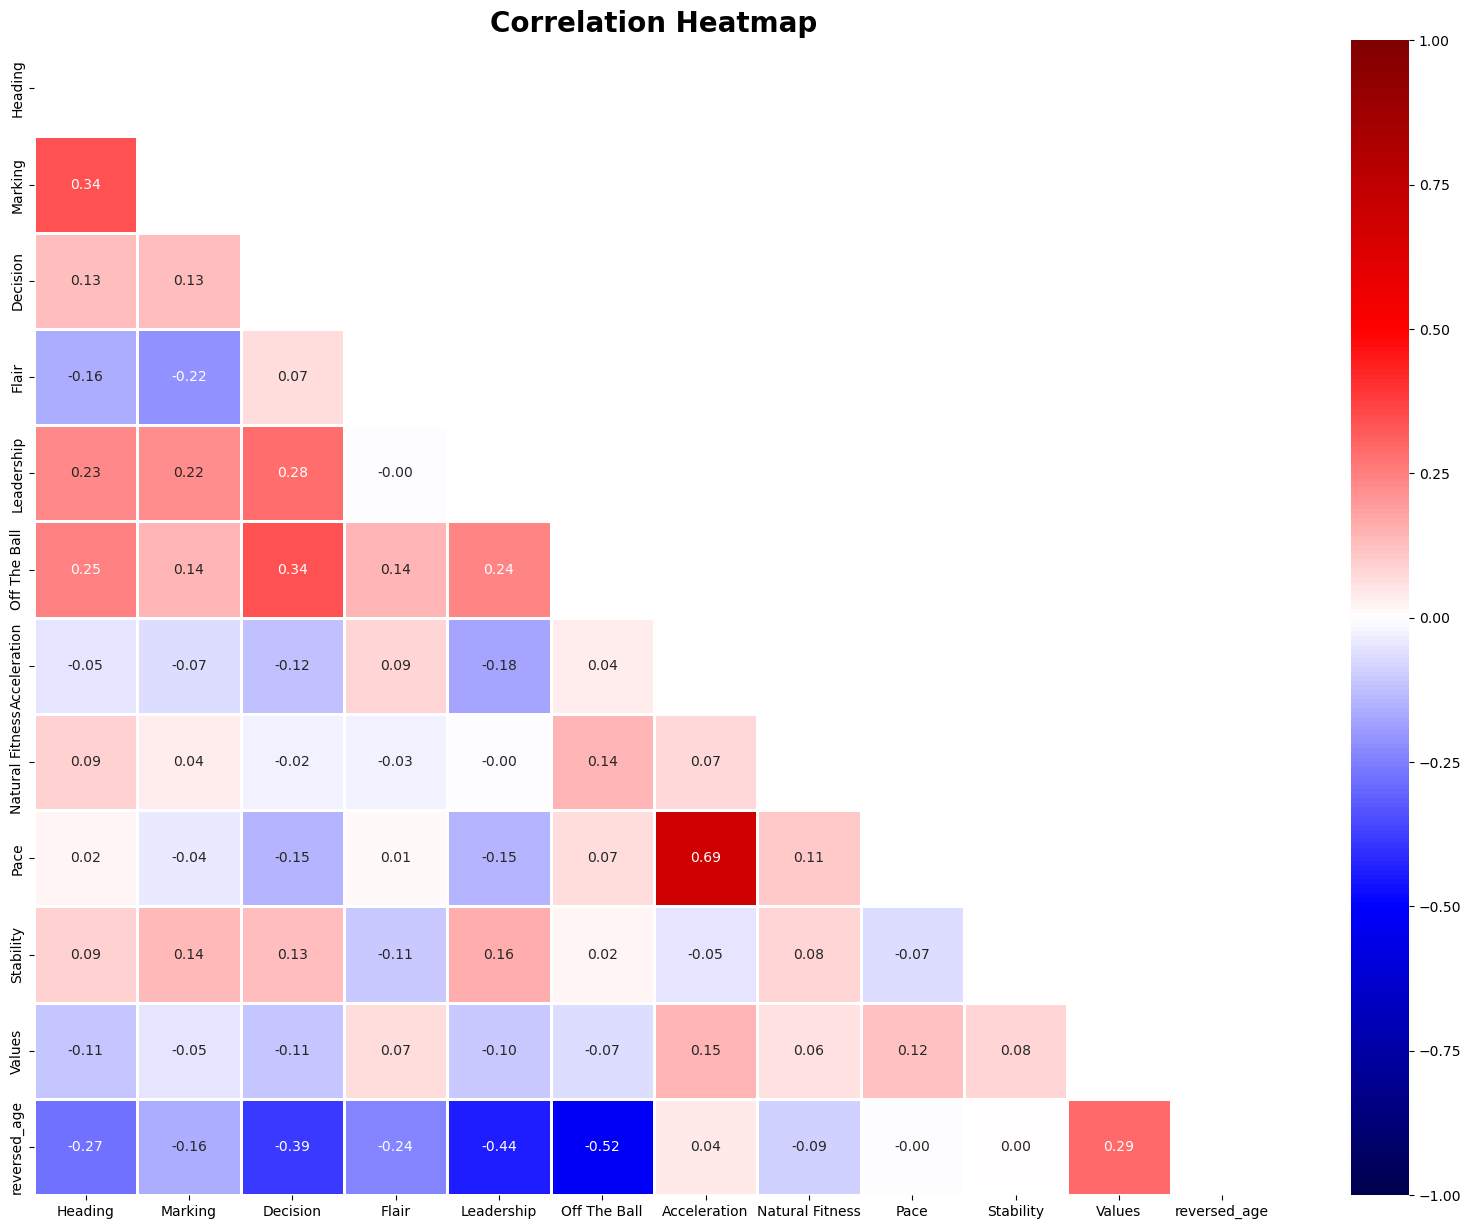

In [24]:

fig = plt.figure(figsize=[20,15])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
#plt.savefig('heatmap1.png',transparent=True, bbox_inches='tight')

Split

Feature Selection

In [25]:
X = amr_df2.copy()
values = X.pop("Values")
y = np.log10(values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Selection - Variance

In [26]:
range_var_df = (pd.DataFrame({
                'Range': X_train.max() - X_train.min(),
                'Variance': X_train.var()})
                .sort_values(by='Variance'))

In [27]:
range_var_df.head()

,Range,Variance
Pace,9,2.037778
Acceleration,10,2.361485
Decision,11,3.794949
Flair,13,3.841243
Off The Ball,13,4.003451


In [28]:
range_var_df.tail()

,Range,Variance
Natural Fitness,13,5.069009
Stability,15,5.625241
Heading,15,6.222538
Leadership,17,10.325767
reversed_age,26,27.463334


In [29]:
""" from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import multiprocessing
import time

# Assuming you have X_train, y_train defined somewhere

param_grid_rf = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5, 10]
}
param_grid_knn = {
    "classifier__n_neighbors": list(range(3, 30)),
    "classifier__weights": ['uniform', 'distance'],
    "classifier__p": [1, 2]
}
param_grid_svm = {
    "classifier__C": [0.1, 1, 10],
    "classifier__epsilon": [0.1, 0.01, 0.001],
    "classifier__kernel": ["linear", "rbf", "poly"]
}

param_grid_dt = {
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5, 10]
}

param_grid_lr = {
    # Add linear regression parameters if needed
}

param_grid_gb = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__max_depth": [3, 5, 7]
}

param_grid_xgb = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__max_depth": [3, 5, 7],
    "classifier__subsample": [0.8, 0.9, 1.0],
    "classifier__colsample_bytree": [0.8, 0.9, 1.0],
}

# List of classifiers and their corresponding parameter grids
classifiers = [
    SVR(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    GradientBoostingRegressor(),
    XGBRegressor()  # Add XGBoost to the list of classifiers
]

param_grids = [
    param_grid_svm,
    param_grid_rf,
    param_grid_knn,
    param_grid_dt,
    param_grid_lr,
    param_grid_gb,
    param_grid_xgb  # Add XGBoost's parameter grid to the list
]

best_classifier = None
best_score = float('-inf')  # Initialize with a very low value

# Perform RandomizedSearchCV for each classifier
for classifier, param_grid in zip(classifiers, param_grids):
    start_time = time.time()

    model_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('classifier', classifier)
    ])

    search = RandomizedSearchCV(
        model_pipeline,
        param_grid,
        n_iter=50,
        cv=5,
        random_state=123,
        n_jobs=multiprocessing.cpu_count() - 1
    )
    search.fit(X_train, y_train)

    if search.best_score_ > best_score:
        best_score = search.best_score_
        best_classifier = classifier.__class__.__name__

# Print the best classifier and its best score
print(f"Best Classifier: {best_classifier}")
print(f"Best Score: {best_score}")
 """

' from sklearn.svm import SVR\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.decomposition import PCA\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom xgboost import XGBRegressor\nimport multiprocessing\nimport time\n\n# Assuming you have X_train, y_train defined somewhere\n\nparam_grid_rf = {\n    "classifier__n_estimators": [50, 100, 200],\n    "classifier__max_depth": [None, 10, 20],\n    "classifier__min_samples_split": [2, 5, 10]\n}\nparam_grid_knn = {\n    "classifier__n_neighbors": list(range(3, 30)),\n    "classifier__weights": [\'uniform\', \'distance\'],\n    "classifier__p": [1, 2]\n}\nparam_grid_svm = {\n    "classifier__C": [0.1, 1, 10],\n    "classifier__epsilon": [0.1, 0.01, 0.0

In [30]:
""" from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
import multiprocessing
import time

# Assuming you have X_train, y_train defined somewhere

param_grid_rf = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5, 10]
}
param_grid_knn = {
    "classifier__n_neighbors": list(range(3, 30)),
    "classifier__weights": ['uniform', 'distance'],
    "classifier__p": [1, 2]
}
param_grid_svm = {
    "classifier__C": [0.1, 1, 10],
    "classifier__epsilon": [0.1, 0.01, 0.001],
    "classifier__kernel": ["linear", "rbf", "poly"]
}

param_grid_dt = {
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5, 10]
}

param_grid_lr = {
    # Add linear regression parameters if needed
}

param_grid_gb = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__max_depth": [3, 5, 7]
}

# List of classifiers and their corresponding parameter grids
classifiers = [
    SVR(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    GradientBoostingRegressor()
]

param_grids = [
    param_grid_svm,
    param_grid_rf,
    param_grid_knn,
    param_grid_dt,
    param_grid_lr,
    param_grid_gb
]

best_classifier = None
best_score = float('-inf')  # Initialize with a very low value

# Perform RandomizedSearchCV for each classifier
for classifier, param_grid in zip(classifiers, param_grids):
    start_time = time.time()

    model_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('classifier', classifier)
    ])

    search = RandomizedSearchCV(
        model_pipeline,
        param_grid,
        n_iter=50,
        cv=5,
        random_state=123,
        n_jobs=multiprocessing.cpu_count() - 1
    )
    search.fit(X_train, y_train)

    if search.best_score_ > best_score:
        best_score = search.best_score_
        best_classifier = classifier.__class__.__name__

# Print the best classifier and its best score
print(f"Best Classifier: {best_classifier}")
print(f"Best Score: {best_score}")
 """

' from sklearn.svm import SVR\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.decomposition import PCA\nfrom sklearn.model_selection import RandomizedSearchCV\nimport multiprocessing\nimport time\n\n# Assuming you have X_train, y_train defined somewhere\n\nparam_grid_rf = {\n    "classifier__n_estimators": [50, 100, 200],\n    "classifier__max_depth": [None, 10, 20],\n    "classifier__min_samples_split": [2, 5, 10]\n}\nparam_grid_knn = {\n    "classifier__n_neighbors": list(range(3, 30)),\n    "classifier__weights": [\'uniform\', \'distance\'],\n    "classifier__p": [1, 2]\n}\nparam_grid_svm = {\n    "classifier__C": [0.1, 1, 10],\n    "classifier__epsilon": [0.1, 0.01, 0.001],\n    "classifier__kernel": ["

ML

In [31]:
from xgboost import XGBRegressor

model_pipeline = make_pipeline(#StandardScaler(), 
                               XGBRegressor(random_state=123))
#y_scaler = StandardScaler()
#y_train_standardized = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

param_grid = {
    "xgbregressor__n_estimators": [100, 300, 500],
    "xgbregressor__max_depth": [3, 5, 7],
    "xgbregressor__learning_rate": [0.01, 0.1, 0.2],
    "xgbregressor__subsample": [0.8, 0.9, 1.0],
    "xgbregressor__colsample_bytree": [0.8, 0.9, 1.0],
    "xgbregressor__gamma": [0, 0.1, 0.2],
    "xgbregressor__min_child_weight": [1, 3, 5]
}


search = GridSearchCV(model_pipeline,
                          param_grid,
                          scoring="neg_mean_absolute_percentage_error",
                          cv=5,
                          n_jobs=-1)

search.fit(X_train, y_train)

best_score_search_xgb = search.best_score_

print(f"{best_score_search_xgb} MAPE")


-0.06212306772015945 MAPE


In [32]:
""" from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBRegressor
import multiprocessing
import time
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have X_train, y_train defined somewhere

# Parameter grid for XGBoost
param_grid_xgb = {
    "xgbregressor__n_estimators": [100, 300, 500],
    "xgbregressor__max_depth": [3, 5, 7],
}

# Parameter grid for other classifiers
param_grid_rf = {

    "classifier__min_samples_split": [2, 5, 10]
}
param_grid_knn = {
    "classifier__n_neighbors": list(range(3, 30)),
    "classifier__weights": ['uniform', 'distance'],
    "classifier__p": [1, 2]


}

param_grid_gb = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__max_depth": [3, 5, 7]
}

# List of classifiers and their corresponding parameter grids
classifiers = [
    #SVR(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    #DecisionTreeRegressor(),
    LinearRegression(),
    GradientBoostingRegressor(),
    XGBRegressor(random_state=123)
]

param_grids = [
    param_grid_rf,
    param_grid_knn,
    param_grid_gb,
    param_grid_xgb
]

# Storage for results
classifier_names = []
classifier_scores = []

# Perform RandomizedSearchCV for each classifier
for classifier, param_grid in zip(classifiers, param_grids):
    start_time = time.time()

    model_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('classifier', classifier)
    ])

    search = RandomizedSearchCV(
        model_pipeline,
        param_grid,
        n_iter=50,
        cv=5,
        scoring="neg_mean_absolute_percentage_error",
        random_state=123,
        n_jobs=multiprocessing.cpu_count() - 1
    )
    search.fit(X_train, y_train)

    elapsed_time = time.time() - start_time

    classifier_name = classifier.__class__.__name__

    classifier_names.append(classifier_name)
    classifier_scores.append(search.best_score_)

    print(f"{classifier_name}: Best Score - {search.best_score_}, Elapsed Time - {elapsed_time} seconds")

# Plotting results
fig, ax = plt.subplots(figsize=(10, 6))
y_pos = np.arange(len(classifier_names))
ax.barh(y_pos, classifier_scores, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(classifier_names)
ax.invert_yaxis()  # Higher score is better
ax.set_xlabel('Negative Mean Absolute Percentage Error')
ax.set_title('Performance Comparison of Classifiers')
plt.show() """
 

' from sklearn.svm import SVR\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.decomposition import PCA\nfrom sklearn.model_selection import RandomizedSearchCV, GridSearchCV\nfrom xgboost import XGBRegressor\nimport multiprocessing\nimport time\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Assuming you have X_train, y_train defined somewhere\n\n# Parameter grid for XGBoost\nparam_grid_xgb = {\n    "xgbregressor__n_estimators": [100, 300, 500],\n    "xgbregressor__max_depth": [3, 5, 7],\n}\n\n# Parameter grid for other classifiers\nparam_grid_rf = {\n\n    "classifier__min_samples_split": [2, 5, 10]\n}\nparam_grid_knn = {\n    "classifier__n_neighbors": list(range(3, 30)),\n    "classifier__weight

Metric

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [34]:
dt_predictions = search.predict(X_test)

In [35]:
dt_mae = mean_absolute_error(y_true = y_test, y_pred = dt_predictions)
dt_rmse = mean_squared_error(y_true = y_test, y_pred = dt_predictions, squared=False)
dt_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = dt_predictions)
dt_r2 = r2_score(y_true = y_test, y_pred = dt_predictions)

In [36]:
pd.DataFrame({"MAE": [dt_mae],
              "RMSE": [dt_rmse],
              "MAPE": [dt_mape],
              "R2": [dt_r2]},
             index=["svr"])

,MAE,RMSE,MAPE,R2
svr,0.398746,0.504923,0.061956,0.212052


In [37]:

# Create a new DataFrame for predictions and actual values
results_df = pd.DataFrame({'Predicted Market Value tree': 10**dt_predictions ,
                           'Actual Market Value': 10**y_test}).sort_values(by='Actual Market Value', ascending=False)

In [38]:
results_df.round(2)

,Predicted Market Value tree,Actual Market Value
544,5.580077e+06,38509256.0
541,1.014413e+07,38350000.0
496,1.068795e+07,38045289.0
438,7.139554e+06,36450000.0
2,1.099989e+07,34748999.0
...,...,...
132,8.845823e+05,287642.0
570,4.184238e+06,280674.0
627,3.607815e+06,268126.0
135,2.900163e+06,250831.0


In [39]:
results_df2 = results_df.merge(amr_df, how='left', left_index=True, right_index=True)


In [40]:
results_df2["Predicted Market Value tree"] = results_df2["Predicted Market Value tree"].round(2)
results_df2["Predicted Market Value tree"] = results_df2["Predicted Market Value tree"].round(2).astype(int)
results_df2.head(50)


,Predicted Market Value tree,Actual Market Value,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
544,5580077,38509256.0,Luke Harris,M/AM C,17,93,-8,Fulham,12,11,12,14,8,10,5,10,4,8,13,9,8,10,5,10,9,10,11,10,10,15,12,10,11,6,10,12,15,7,11,9,11,12,11,10,10,10,10,5,16,1,1,3,4,1,3,2,1,2,1,2,12,12,4,11,13,10,13,17,1,1,1,1,1,1,1,1,16,1,12,20,12,1,177,0,11,20,38509256,2000141316,AMC
541,10144126,38350000.0,Rayane Bounida,AM RLC,16,95,-85,AFC Ajax,8,8,16,10,16,6,2,8,1,2,10,14,2,16,7,6,14,8,6,11,10,13,17,2,8,2,4,10,15,16,5,3,8,13,6,3,6,5,7,6,12,3,1,2,3,2,3,1,4,1,2,3,12,11,8,9,11,8,15,14,1,1,1,1,1,1,1,1,10,1,18,20,18,12,162,0,14,20,38350000,2000127879,AMC
496,10687950,38045289.0,Wanya Marçal-Madivádua,M/AM LC,19,100,-75,Leicester City,10,11,12,10,12,10,8,12,8,10,12,7,8,12,9,10,10,11,12,11,9,5,15,8,10,9,12,13,12,6,12,8,8,14,13,10,20,11,6,13,9,4,3,3,3,1,3,3,1,3,2,1,10,11,2,11,13,13,9,16,1,1,1,1,14,10,1,15,18,1,15,20,14,1,181,76,12,20,38045289,28127132,AMC
438,7139554,36450000.0,Pedro Brazão,AM RLC,19,110,-8,Futebol Clube de Famalicão,12,12,14,8,14,12,7,8,4,5,12,9,5,16,10,9,8,13,11,12,10,11,16,5,10,7,11,10,13,15,12,6,13,13,12,7,9,7,8,5,12,1,1,2,3,3,2,3,1,1,3,4,11,10,7,10,12,14,10,17,1,1,1,1,1,1,1,1,13,1,18,20,19,1,177,64,20,10,36450000,83261936,AMC
2,10999894,34748999.0,Pedro Gonçalves,M/AM RLC,24,153,161,Sporting Clube de Portugal,11,12,15,17,15,14,8,14,10,6,14,8,9,16,11,16,9,15,12,15,14,14,14,8,15,10,11,13,15,16,14,8,13,15,14,9,13,12,12,8,10,2,4,3,3,3,3,1,3,2,2,1,17,12,6,13,16,15,14,13,1,1,1,1,1,1,1,12,18,10,18,20,16,14,174,67,12,20,34748999,29192705,AMC
428,6220791,33000000.0,Bruno Iglesias,AM LC,19,111,-9,R. Madrid,10,9,14,10,13,13,8,10,3,2,12,3,4,14,8,11,9,11,13,13,11,16,17,8,12,11,10,9,12,11,11,12,6,12,11,10,14,5,15,7,16,3,2,3,3,1,1,1,1,3,4,2,17,9,4,10,13,10,10,12,1,1,1,1,1,1,1,12,14,10,16,20,12,1,179,64,16,20,33000000,2000052096,AMC
29,4588026,31622131.0,Ebere Eze,M/AM LC,24,141,155,Crystal Palace,14,13,17,13,14,13,5,13,5,6,14,13,6,15,8,13,8,16,12,15,14,15,17,9,12,8,14,12,13,15,16,9,13,13,12,14,13,1,12,10,13,3,3,3,4,3,2,1,4,3,1,3,14,16,3,12,15,15,12,15,1,1,1,1,1,1,1,14,18,12,17,20,13,1,178,69,13,20,31622131,29156522,AMC
523,19534422,30900198.0,Omari Hutchinson,AM RLC,18,97,-8,Chelsea,10,10,14,10,12,10,4,12,1,4,12,9,7,13,8,9,7,8,7,12,7,11,16,4,12,5,11,12,15,14,12,4,14,13,9,5,18,10,11,11,18,2,1,3,3,3,3,2,2,2,2,1,15,13,6,10,15,10,10,17,1,1,1,1,12,1,1,13,15,1,16,20,17,1,169,0,20,10,30900198,2000047221,AMC
82,3291320,29229866.0,Joe Aribo,AM RLC,26,133,144,Southampton,10,11,16,14,19,8,8,12,6,6,13,9,10,16,7,16,6,15,10,14,12,11,15,5,14,9,11,15,11,14,15,13,14,13,14,15,8,4,10,4,12,1,1,1,3,1,2,2,3,1,3,1,14,11,3,8,8,13,10,10,1,1,1,1,1,1,14,1,15,1,17,20,19,1,188,74,20,7,29229866,89046527,AMC
419,2100812,28200001.0,Sven Mijnans,M/AM C,22,112,-75,Sparta Rotterdam,13,11,14,11,14,15,11,11,5,12,13,14,6,14,12,12,11,7,6,14,10,10,10,7,13,13,13,14,13,10,11,10,12,10,10,8,10,5,10,10,15,2,1,3,3,3,2,1,2,3,1,1,13,12,6,13,11,12,10,16,1,1,1,1,1,1,1,10,18,10,12,20,12,1,180,72,20,12,28200001,37077008,AMC


THE DAMN PREDICTION


In [41]:
df_predict_og = df_original.loc[df_original["Values"] > 50000000]
df_predict = df_predict_og

In [42]:
df_predict.drop(["Nationality","Rental club","Salary","Colour of skin","Date of birth","Number of national team appearances","Goals scored for the national team","Race","World reputation","Domestic reputation","Current reputation","RCA" ], axis=1,inplace=True)

/var/folders/dp/sb0zbjrn4y70c9_f08rwfmx00000gn/T/ipykernel_46178/1369094623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict.drop(["Nationality","Rental club","Salary","Colour of skin","Date of birth","Number of national team appearances","Goals scored for the national team","Race","World reputation","Domestic reputation","Current reputation","RCA" ], axis=1,inplace=True)


In [43]:
df_predict = pd.DataFrame(df_predict)

columns_to_check = {
    "GK", "DL", "DC", "DR", "WBL", "WBR", "DM", "ML", "MC", "MR", "AML", "AMC", "AMR", "ST"
}

def find_column_name(row):
    for col_name in columns_to_check:
        if row[col_name] == 20:
            return col_name
    return None

df_predict['Best_Position'] = df_predict.apply(find_column_name, axis=1)

In [44]:
amr_df_predict = df_predict[(df_predict["Best_Position"] == "AMC")]
amr_df_predict = amr_df_predict.reset_index(drop=True)
amr_df_predict.head(50)

,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
0,Thomas Müller,AM RC,32,171,174,FC Bayern München,11,17,11,13,13,7,14,10,8,9,16,13,11,13,17,20,13,16,16,18,16,18,13,17,20,11,20,17,12,12,13,13,20,14,19,11,16,9,17,2,18,2,3,2,2,1,1,1,1,3,1,1,10,17,10,20,19,16,10,10,1,1,1,1,1,1,10,10,14,15,11,20,18,15,185,76,13,20,347975206,35011448,AMC
1,Kai Havertz,AM/S C,23,167,180,Chelsea,11,12,14,16,18,11,13,11,8,7,14,12,10,17,11,15,11,17,10,17,16,10,15,7,17,10,15,13,13,13,13,14,16,17,15,13,13,6,16,4,16,2,2,3,1,3,3,3,2,3,2,3,12,14,5,12,16,15,15,19,1,1,1,1,1,1,10,12,14,14,12,20,14,19,186,77,20,10,305612129,91151081,AMC
2,Bruno Fernandes,M/AM C,27,166,174,Manchester UFC,16,16,11,15,17,16,10,16,4,3,17,19,8,17,18,16,17,15,14,18,10,17,17,17,17,6,15,15,13,15,13,9,18,14,19,10,12,13,13,3,15,1,1,2,3,3,3,1,1,3,1,1,18,15,5,13,14,17,6,7,1,1,1,1,1,1,1,10,16,10,12,20,14,10,179,69,13,20,265261481,43124203,AMC
3,Mason Mount,AM RLC,23,165,170,Chelsea,14,12,11,14,15,14,9,12,5,7,15,15,11,15,14,14,15,15,12,12,16,18,13,12,17,14,18,20,15,13,10,9,15,15,20,11,12,6,14,8,12,1,3,2,2,1,3,4,3,2,3,3,16,18,6,13,14,16,16,17,1,1,1,1,1,1,14,1,15,1,16,20,15,1,178,70,12,20,126331239,28103590,AMC
4,Martin Ødegaard,M/AM C,23,160,178,Arsenal,14,14,16,12,17,15,9,13,7,10,16,10,8,17,7,18,10,15,12,17,16,15,16,14,16,9,17,14,14,16,15,9,13,13,15,11,11,4,12,7,13,1,1,3,2,1,3,1,1,3,1,2,13,16,6,12,14,18,13,14,1,1,1,1,1,1,13,10,18,13,10,20,14,8,178,68,20,10,272952661,53095137,AMC
5,João Félix,AM/S RLC,22,159,177,A. Madrid,11,12,17,15,16,12,12,13,4,4,17,14,7,18,14,15,11,15,13,16,16,16,19,7,18,6,12,11,13,15,13,9,14,12,12,9,12,14,15,9,8,2,1,2,1,1,3,1,2,1,4,2,15,18,13,8,17,15,10,10,1,1,1,1,1,1,1,12,10,12,18,20,15,19,178,74,15,20,95220000,83169822,AMC
6,Christopher Nkunku,M/AM RLC,24,158,163,RB Leipzig,14,13,14,14,14,14,6,13,7,7,16,11,7,15,14,15,12,16,15,15,16,11,15,6,15,7,16,15,15,15,13,9,14,15,16,11,15,11,13,4,18,3,3,2,3,2,1,2,1,2,2,2,8,12,8,12,10,13,14,14,1,1,1,1,1,10,1,15,17,15,16,20,17,14,175,73,12,20,65000001,85140301,AMC
7,Sergio Canales,M/AM C,31,157,160,Real Hispalis,14,13,16,14,17,14,8,14,10,7,17,13,8,17,7,16,11,15,14,17,15,12,16,14,16,10,15,14,15,15,15,8,12,13,13,12,15,6,15,12,13,2,3,3,2,1,1,3,1,2,3,3,11,13,7,14,12,17,16,14,1,1,1,1,1,1,12,1,19,1,14,20,13,5,180,64,20,8,347975206,67053076,AMC
8,Alejandro Gómez,AM LC,34,155,161,Sevilla,14,16,17,12,18,13,5,17,3,3,16,14,5,17,12,15,14,12,12,17,15,17,17,14,13,4,14,11,15,17,14,5,15,13,12,7,14,6,14,9,15,3,1,3,1,3,1,3,3,3,1,1,16,16,9,11,14,18,16,15,1,1,1,1,1,1,1,10,15,1,15,20,12,15,167,68,13,20,347975206,955978,AMC
9,Jamal Musiala,M/AM RLC,19,155,180,FC Bayern München,7,8,18,13,16,6,9,13,6,11,14,12,12,18,12,14,12,13,12,15,13,16,18,6,14,11,15,15,15,17,15,10,16,15,12,9,16,6,17,4,16,2,1,1,1,2,2,2,3,3,1,2,18,19,4,14,17,17,16,18,1,1,1,1,1,1,10,12,17,12,18,20,15,12,183,70,12,20,88884003,28124579,AMC


In [45]:
amr_df2_predict = amr_df_predict[['ca','Age','Values','Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Position.1', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability',
       'diversity', ]].applymap(lambda x: np.nan if x < 0 else x).dropna()

In [46]:
amr_df2_predict = amr_df2_predict.loc[:, AMR_essential_ft]

In [47]:
amrf_df__predict_values = amr_df2_predict.pop("Values")


In [48]:
max_age = amr_df2_predict['Age'].max()
amr_df2_predict['reversed_age'] = max_age - amr_df2_predict['Age']
amr_df2_predict.drop(columns=['Age'], inplace=True)

In [49]:
dt_predictions_50 = search.predict(amr_df2_predict)

In [50]:
dt_predictions_50=10**dt_predictions_50

In [51]:
len(dt_predictions_50)

76

In [52]:
amr_df_predict["Values Predicted"] = dt_predictions_50.round(2).astype(int)

In [53]:
to_show=amr_df_predict
to_show.head(10)

,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position,Values Predicted
0,Thomas Müller,AM RC,32,171,174,FC Bayern München,11,17,11,13,13,7,14,10,8,9,16,13,11,13,17,20,13,16,16,18,16,18,13,17,20,11,20,17,12,12,13,13,20,14,19,11,16,9,17,2,18,2,3,2,2,1,1,1,1,3,1,1,10,17,10,20,19,16,10,10,1,1,1,1,1,1,10,10,14,15,11,20,18,15,185,76,13,20,347975206,35011448,AMC,1573556
1,Kai Havertz,AM/S C,23,167,180,Chelsea,11,12,14,16,18,11,13,11,8,7,14,12,10,17,11,15,11,17,10,17,16,10,15,7,17,10,15,13,13,13,13,14,16,17,15,13,13,6,16,4,16,2,2,3,1,3,3,3,2,3,2,3,12,14,5,12,16,15,15,19,1,1,1,1,1,1,10,12,14,14,12,20,14,19,186,77,20,10,305612129,91151081,AMC,8214674
2,Bruno Fernandes,M/AM C,27,166,174,Manchester UFC,16,16,11,15,17,16,10,16,4,3,17,19,8,17,18,16,17,15,14,18,10,17,17,17,17,6,15,15,13,15,13,9,18,14,19,10,12,13,13,3,15,1,1,2,3,3,3,1,1,3,1,1,18,15,5,13,14,17,6,7,1,1,1,1,1,1,1,10,16,10,12,20,14,10,179,69,13,20,265261481,43124203,AMC,7063687
3,Mason Mount,AM RLC,23,165,170,Chelsea,14,12,11,14,15,14,9,12,5,7,15,15,11,15,14,14,15,15,12,12,16,18,13,12,17,14,18,20,15,13,10,9,15,15,20,11,12,6,14,8,12,1,3,2,2,1,3,4,3,2,3,3,16,18,6,13,14,16,16,17,1,1,1,1,1,1,14,1,15,1,16,20,15,1,178,70,12,20,126331239,28103590,AMC,12709524
4,Martin Ødegaard,M/AM C,23,160,178,Arsenal,14,14,16,12,17,15,9,13,7,10,16,10,8,17,7,18,10,15,12,17,16,15,16,14,16,9,17,14,14,16,15,9,13,13,15,11,11,4,12,7,13,1,1,3,2,1,3,1,1,3,1,2,13,16,6,12,14,18,13,14,1,1,1,1,1,1,13,10,18,13,10,20,14,8,178,68,20,10,272952661,53095137,AMC,6074315
5,João Félix,AM/S RLC,22,159,177,A. Madrid,11,12,17,15,16,12,12,13,4,4,17,14,7,18,14,15,11,15,13,16,16,16,19,7,18,6,12,11,13,15,13,9,14,12,12,9,12,14,15,9,8,2,1,2,1,1,3,1,2,1,4,2,15,18,13,8,17,15,10,10,1,1,1,1,1,1,1,12,10,12,18,20,15,19,178,74,15,20,95220000,83169822,AMC,6042320
6,Christopher Nkunku,M/AM RLC,24,158,163,RB Leipzig,14,13,14,14,14,14,6,13,7,7,16,11,7,15,14,15,12,16,15,15,16,11,15,6,15,7,16,15,15,15,13,9,14,15,16,11,15,11,13,4,18,3,3,2,3,2,1,2,1,2,2,2,8,12,8,12,10,13,14,14,1,1,1,1,1,10,1,15,17,15,16,20,17,14,175,73,12,20,65000001,85140301,AMC,12311881
7,Sergio Canales,M/AM C,31,157,160,Real Hispalis,14,13,16,14,17,14,8,14,10,7,17,13,8,17,7,16,11,15,14,17,15,12,16,14,16,10,15,14,15,15,15,8,12,13,13,12,15,6,15,12,13,2,3,3,2,1,1,3,1,2,3,3,11,13,7,14,12,17,16,14,1,1,1,1,1,1,12,1,19,1,14,20,13,5,180,64,20,8,347975206,67053076,AMC,1835830
8,Alejandro Gómez,AM LC,34,155,161,Sevilla,14,16,17,12,18,13,5,17,3,3,16,14,5,17,12,15,14,12,12,17,15,17,17,14,13,4,14,11,15,17,14,5,15,13,12,7,14,6,14,9,15,3,1,3,1,3,1,3,3,3,1,1,16,16,9,11,14,18,16,15,1,1,1,1,1,1,1,10,15,1,15,20,12,15,167,68,13,20,347975206,955978,AMC,840694
9,Jamal Musiala,M/AM RLC,19,155,180,FC Bayern München,7,8,18,13,16,6,9,13,6,11,14,12,12,18,12,14,12,13,12,15,13,16,18,6,14,11,15,15,15,17,15,10,16,15,12,9,16,6,17,4,16,2,1,1,1,2,2,2,3,3,1,2,18,19,4,14,17,17,16,18,1,1,1,1,1,1,10,12,17,12,18,20,15,12,183,70,12,20,88884003,28124579,AMC,13473912


In [54]:
to_show = to_show.reindex(columns=['Name', 'Values', 'Values Predicted',"Position"])
to_show


,Name,Values,Values Predicted,Position
0,Thomas Müller,347975206,1573556,AM RC
1,Kai Havertz,305612129,8214674,AM/S C
2,Bruno Fernandes,265261481,7063687,M/AM C
3,Mason Mount,126331239,12709524,AM RLC
4,Martin Ødegaard,272952661,6074315,M/AM C
5,João Félix,95220000,6042320,AM/S RLC
6,Christopher Nkunku,65000001,12311881,M/AM RLC
7,Sergio Canales,347975206,1835830,M/AM C
8,Alejandro Gómez,347975206,840694,AM LC
9,Jamal Musiala,88884003,13473912,M/AM RLC


In [55]:
to_show[to_show['Values'] != 347975206].iloc[10:]


,Name,Values,Values Predicted,Position
13,Iker Muniain,127050007,1766484,M/AM RLC
14,Nicolò Zaniolo,57585624,5044447,AM RC
15,Emile Smith Rowe,96746387,8949130,AM RLC
16,Lucas Paquetá,57424604,4859900,M/AM RC
17,Charles De Ketelaere,72036004,5222447,M/AM/S C
18,Alexis Mac Allister,52732047,4097971,DM/M/AM C
19,Florian Wirtz,120096006,6369009,M/AM C
20,Fábio Vieira,91559236,4939003,M/AM RLC
23,Giovanni Reyna,115855997,7068093,M/AM LC
24,Jonathan David,66878046,3632598,AM/S RLC


In [56]:
amr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 87 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 640 non-null    object
 1   Position             640 non-null    object
 2   Age                  640 non-null    int64 
 3   ca                   640 non-null    int64 
 4   pa                   640 non-null    int64 
 5   Club                 640 non-null    object
 6   Corners              640 non-null    int64 
 7   Crossing             640 non-null    int64 
 8   Dribbling            640 non-null    int64 
 9   Finishing            640 non-null    int64 
 10  First Touch          640 non-null    int64 
 11  Free Kick Taking     640 non-null    int64 
 12  Heading              640 non-null    int64 
 13  Long Shots           640 non-null    int64 
 14  Long Throws          640 non-null    int64 
 15  Marking              640 non-null    int64 
 16  Passing 

In [57]:
amr_df_predict.drop("Values",inplace=True, axis=1)

In [58]:
amr_df_predict.rename(columns={"Values Predicted": "Values"}, inplace=True)


In [59]:
amr_df_predict = pd.concat([amr_df, amr_df_predict], ignore_index=True)


In [60]:
amr_df_predict

,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
0,Pablo Sarabia,AM RLC,30,154,156,Paris Saint-Germain,15,15,15,15,17,15,7,13,5,7,15,13,6,17,10,13,11,13,13,16,14,9,15,8,15,8,15,14,15,16,15,6,12,14,13,10,14,9,15,10,15,2,1,1,1,2,1,2,2,3,4,1,7,12,10,10,12,14,14,10,1,1,1,1,10,1,1,15,13,15,17,20,19,1,174,70,20,10,36552285,67045428,AMC
1,Nabil Fekir,AM/S RLC,29,153,158,Real Hispalis,15,13,16,15,16,15,6,14,4,5,16,13,5,17,10,13,12,15,13,16,15,16,16,16,14,8,12,12,15,16,16,5,12,15,14,17,12,12,16,10,13,2,1,2,2,1,3,3,3,4,3,2,10,15,9,13,12,14,9,10,1,1,1,1,1,1,1,1,12,1,16,20,16,17,173,72,20,6,43312502,29114975,AMC
2,Pedro Gonçalves,M/AM RLC,24,153,161,Sporting Clube de Portugal,11,12,15,17,15,14,8,14,10,6,14,8,9,16,11,16,9,15,12,15,14,14,14,8,15,10,11,13,15,16,14,8,13,15,14,9,13,12,12,8,10,2,4,3,3,3,3,1,3,2,2,1,17,12,6,13,16,15,14,13,1,1,1,1,1,1,1,12,18,10,18,20,16,14,174,67,12,20,34748999,29192705,AMC
3,James Rodríguez,AM RLC,31,150,175,Olympiacos SF Piraeus,17,17,15,16,18,16,12,17,8,6,17,14,6,18,10,16,12,18,11,19,17,13,18,13,16,8,14,9,11,13,14,11,12,10,12,11,15,10,16,15,15,3,2,2,2,3,1,2,3,1,1,4,14,15,16,6,15,12,9,11,1,1,1,1,1,1,1,14,14,14,16,20,17,9,180,75,20,7,14778545,76002390,AMC
4,Hakim Ziyech,M/AM RLC,29,150,160,Chelsea,14,14,15,10,16,16,10,14,7,6,15,13,6,16,13,17,13,13,10,17,9,14,17,11,14,6,12,12,14,16,12,10,15,13,15,9,11,10,14,6,15,3,1,3,2,2,1,1,1,1,3,4,14,14,12,14,14,15,15,12,1,1,1,1,1,1,1,17,19,17,17,20,19,13,181,68,20,13,41548240,37040604,AMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,Iker Losada,M/AM C,20,110,-75,Vigo,7,6,14,14,14,9,10,8,7,10,12,4,10,11,10,14,7,9,10,14,14,5,10,8,13,11,10,11,14,14,10,9,10,14,9,8,14,5,15,8,18,3,1,4,1,1,1,1,3,1,3,1,8,12,5,11,12,9,10,17,1,1,1,1,1,1,1,1,16,1,1,20,1,14,175,70,5,20,6119453,67278254,AMC
712,Wu Xi,DM/M/AM C,33,106,113,Shanghai Shenhua,10,11,10,12,11,9,9,12,10,8,11,12,9,11,8,13,9,15,13,12,13,15,12,11,12,10,12,13,12,11,10,10,14,11,11,9,17,8,12,5,16,1,4,2,1,2,3,2,2,2,2,3,7,17,9,12,14,13,8,15,1,1,1,11,1,1,18,1,19,12,1,20,1,1,180,75,10,20,431015,23082336,AMC
713,Zhang Xizhe,M/AM LC,31,97,120,Beijing Guo'an,12,10,10,9,12,12,7,6,5,5,13,12,6,14,9,11,8,12,12,14,11,13,14,9,13,7,14,13,11,12,11,8,12,10,10,7,14,7,16,7,14,1,3,2,2,3,1,3,1,2,3,1,7,11,8,14,12,14,12,10,1,1,1,1,1,1,12,15,17,13,18,20,14,10,180,69,10,20,414086,23053137,AMC
714,Yin Hongbo,AM RLC,32,97,108,Meizhou Hakka,11,10,12,10,10,11,8,10,7,2,13,10,3,13,11,10,8,11,9,12,12,13,14,9,12,10,12,12,12,13,6,8,8,13,10,8,11,6,9,11,10,2,1,1,1,3,2,3,1,3,1,1,14,13,1,10,12,14,10,11,1,1,1,1,1,1,9,15,15,12,18,20,16,1,180,65,20,10,334985,23034722,AMC


In [61]:
import pickle

with open('amr_df_predict.pickle', 'wb') as f:
    pickle.dump(amr_df_predict, f)
    